<a href="https://colab.research.google.com/github/vaasanthini/MLBASICS/blob/main/LAPTOPPRICEEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                        -----  **LAPTOP** **PRICE PREDICTION**  -----


# Start the EDA by importing the required libraries

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the required dataset and define the path of the dataset

In [61]:
df=pd.read_csv("/content/laptopData.csv")

# Let's start understanding the dataset by starting out with knowing the columns (Features)

In [52]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# Count the number of features

In [53]:
num_columns = df.shape[1]
print(f"Number of columns in the dataset: {num_columns}")

Number of columns in the dataset: 12


#Remove Unwanted Columns

In [94]:

df.drop("Unnamed: 0",axis=1,inplace=True)

# Let's find out different companies in the dataset

In [54]:
unique_company = df['Company'].unique()
print(unique_company)

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


# Let's have an overview of the dataset

In [55]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# To understand the dimension of the dataset, le's checkout the shape of the dataset

In [63]:
df.shape

(1303, 12)

# Check the presence of NULL values in the data

In [58]:
df.isnull().sum()

,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30


# *Check the datatype and non-null values for each feature*

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


# Delete the rows with null values and check again for null values and display

In [117]:
df.dropna(inplace=True)
df.isna().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


# Display the statistics

In [56]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


# Now, let's check different types of operating systems

In [65]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [66]:
df.groupby("OpSys").mean("Price")

,Unnamed: 0,Price
OpSys,,
Android,1114.000000,29250.720000
Chrome OS,772.370370,29495.018667
Linux,624.852459,32919.414846
Mac OS X,695.750000,67285.780200
No OS,555.984127,31892.934400
Windows 10,649.446991,62214.308452
Windows 10 S,354.375000,68543.654400
Windows 7,1036.755556,89864.783040
macOS,55.230769,93220.327385


# PLOT A BARPLOT FOR OPERATING VS PRICE
## To understand the correaltion of os and price

<ipython-input-150-8ffed3a7b160>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=OS.index,y=OS.values,palette='plasma')


Text(0.5, 1.0, 'OPERATING SYSTEM VS PRICE')

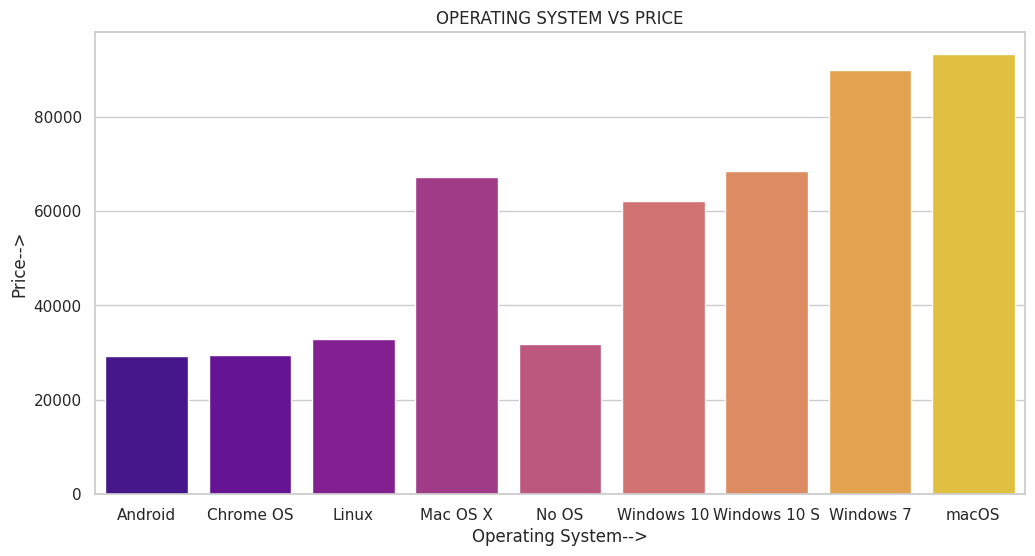

In [150]:
OS=df.groupby("OpSys")["Price"].mean()
plt.figure(figsize=(12,6))
sns.barplot(x=OS.index,y=OS.values,palette='plasma')
plt.xlabel("Operating System-->")
plt.ylabel("Price-->")
plt.title("OPERATING SYSTEM VS PRICE")


# PLOT A BARPLOT FOR COMPANY VS PRICE
## To understand the impact of company (BRAND) on price of the laptop

<ipython-input-151-02b9d54577d9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X,y=Y,palette="plasma")


Text(0.5, 1.0, 'COMPANY VS PRICE')

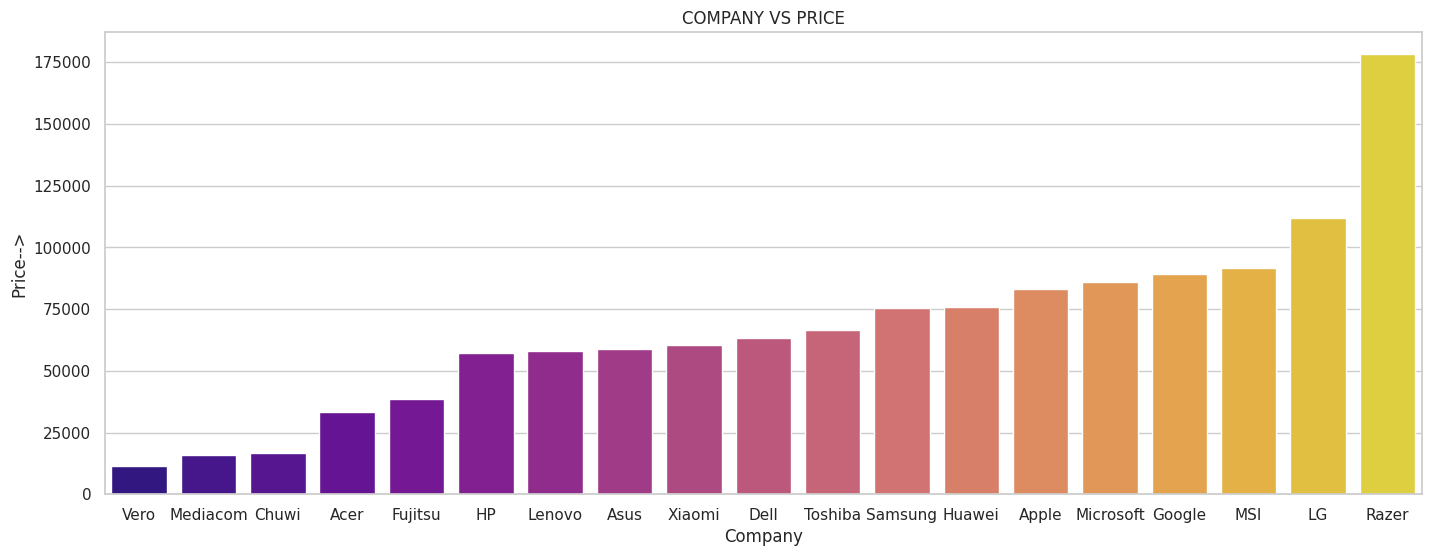

In [151]:
company=df.groupby("Company")["Price"].mean().sort_values()
X=company.index
Y=company.values

plt.figure(figsize=(17,6))
sns.barplot(x=X,y=Y,palette="plasma")
plt.ylabel("Price-->")
plt.xlabel("Company")
plt.title("COMPANY VS PRICE")

# Let's know which company laptops are most represented

In [80]:
company_count=df["Company"].value_counts()
company_count

,count
Company,
Lenovo,290
Dell,287
HP,266
Asus,156
Acer,103
MSI,53
Toshiba,47
Apple,21
Samsung,9


# PLOT A BARPLOT FOR NO.OF LAPTOPS VS COMPANY
## To understand the number of laptops of each company that are represented in the dataset

Text(0.5, 1.0, 'NUMBER OF LAPTOPS OF EACH COMPANY')

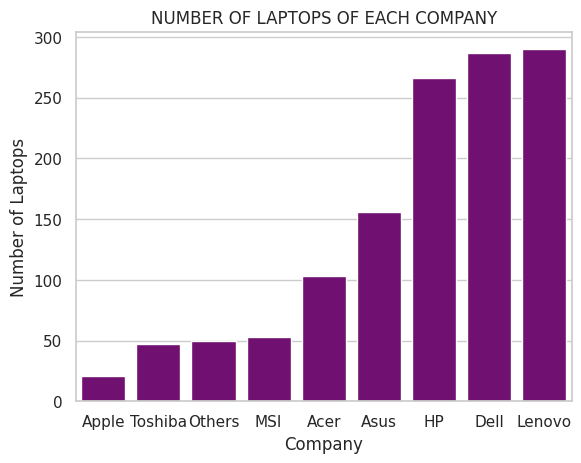

In [153]:
company_count_updated=company_count_updated.sort_values()
Y=company_count_updated.values
X=company_count_updated.index
sns.barplot(x=X,y=Y,color="purple")
plt.ylabel("Number of Laptops")
plt.title("NUMBER OF LAPTOPS OF EACH COMPANY")

# PLOT A BARPLOT FOR PRICES VS TYPENAME
## To understand the impact of the type of laptop on the price

Text(0, 0.5, 'Prices')

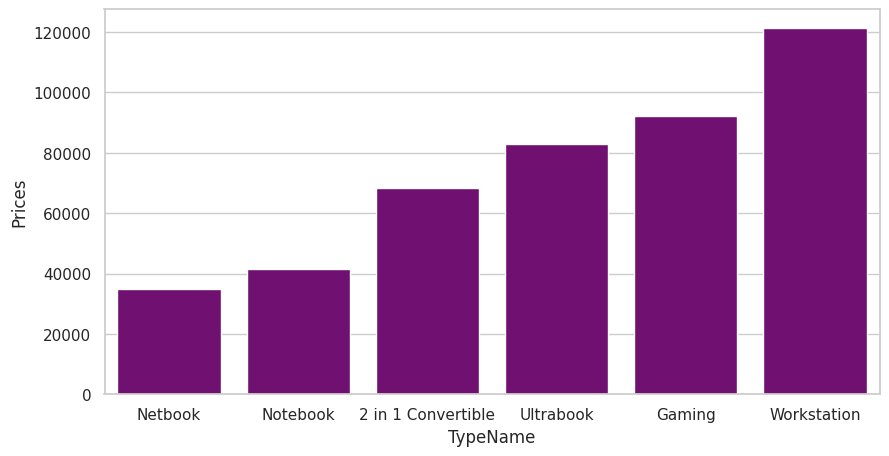

In [93]:
type=df.groupby("TypeName")["Price"].mean().sort_values()
X=type.index
Y=type.values
plt.figure(figsize=(10,5))
sns.barplot(x=X,y=Y,color = "purple")
plt.ylabel("Prices")

# PLOT A BOXPLOT FOR LAPTOP PRICES
## To identify the outliers
## From the box plot, we can conclude that outliers exist in the dataset

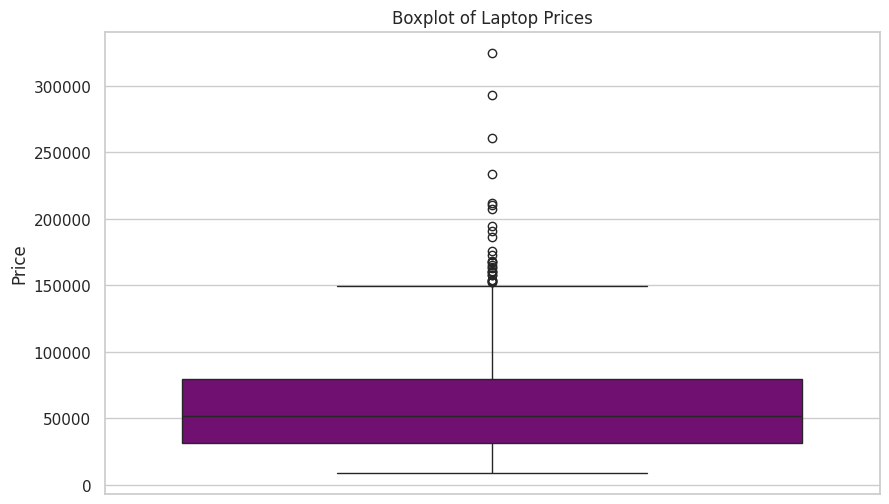

In [160]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'],color="purple")
plt.title('Boxplot of Laptop Prices')
plt.ylabel('Price')
plt.show()

# PLOT A SCATTERPLOT FOR RAM VS PRICE
## To understand the corelation between RAM and price of the laptop

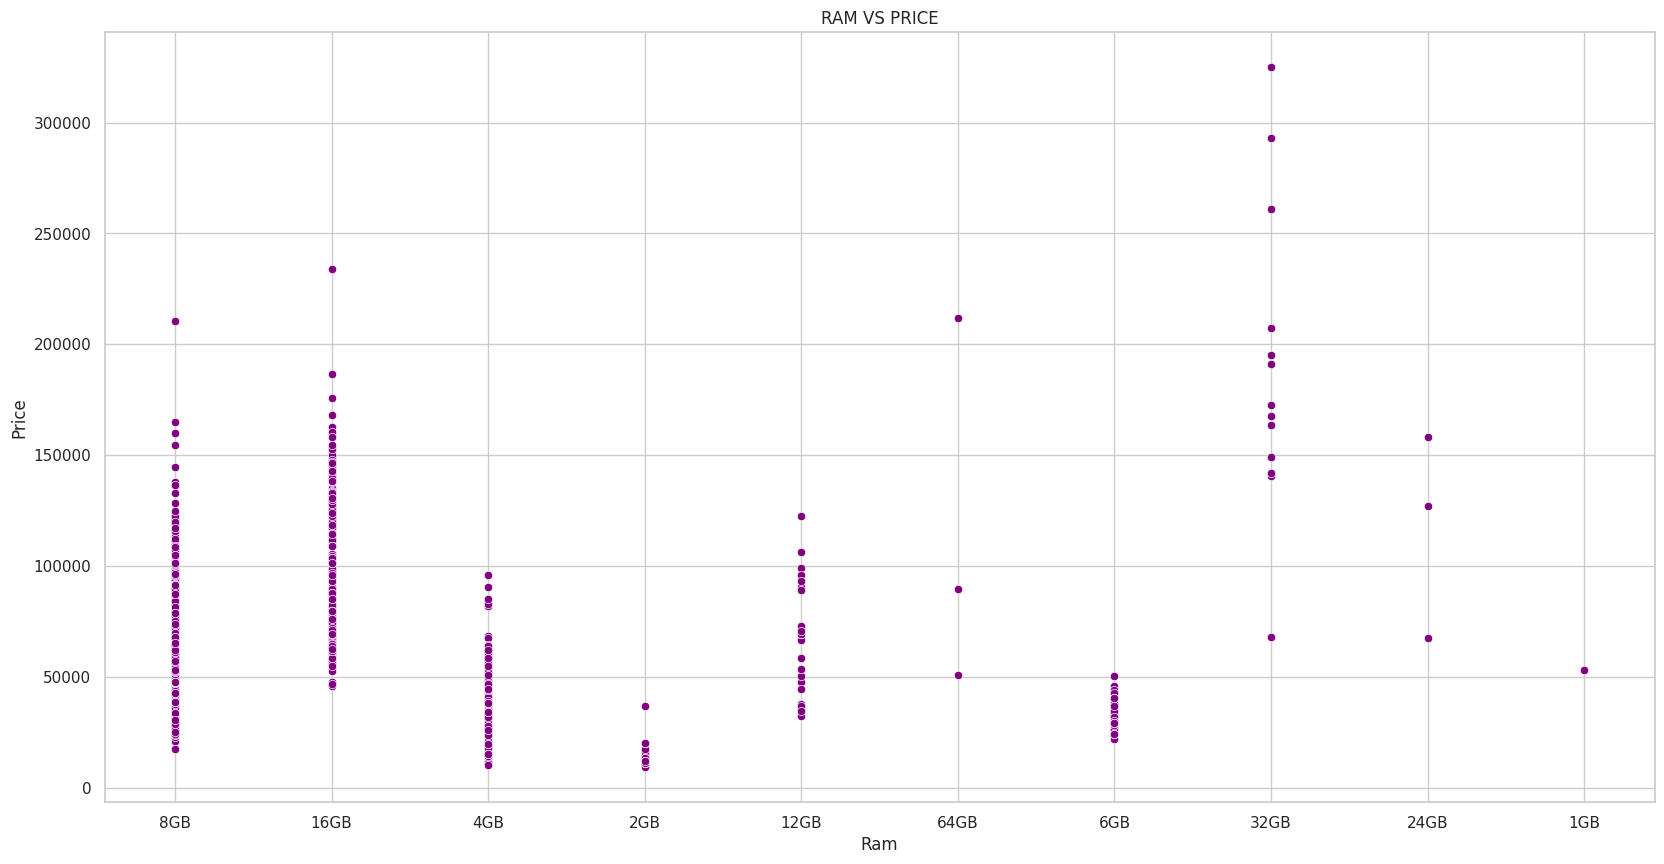

In [159]:

plt.figure(figsize=(20,10))
sns.scatterplot(x='Ram', y='Price', data=df,color = "purple")
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('RAM VS PRICE')
plt.show()

# Generate a word cloud for the dataset
## To know the words that are repeated very often

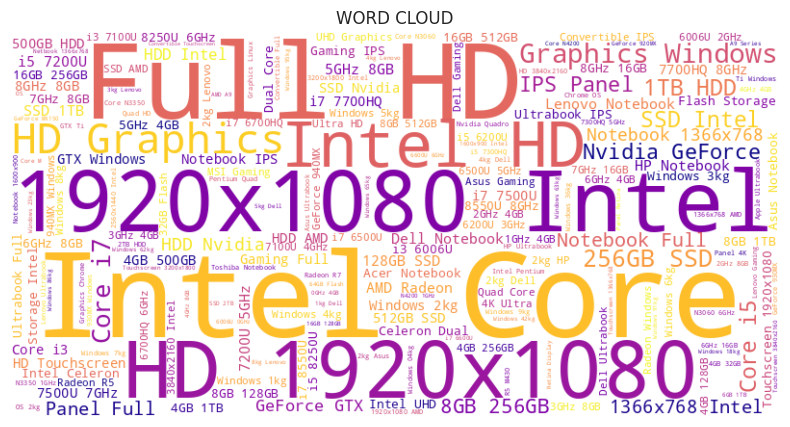

In [161]:
from wordcloud import WordCloud
text_columns = ['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']
text_data = ' '.join(df[text_columns].fillna('').astype(str).values.flatten())
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="plasma").generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORD CLOUD')
plt.show()

# ***FINAL CONCLUSION ***
# *One of the most critical findings from the analysis is the strong correlation between specifications such as RAM, typename, and storage options—and their corresponding prices. For consumers, this information is very useful. our analysis revealed that laptops with higher RAM configurations tend to be priced more, indicating that consumers seeking enhanced performance may need to invest more. This knowledge allows buyers to align their needs with their budgets, ensuring they select a laptop that meets their requirements without overspending.*